#  ***ZOMATO RESTAURANT RECOMMANDATION SYSTEM***








# Mount the dataset into colab notebook.

In [1]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upload the image

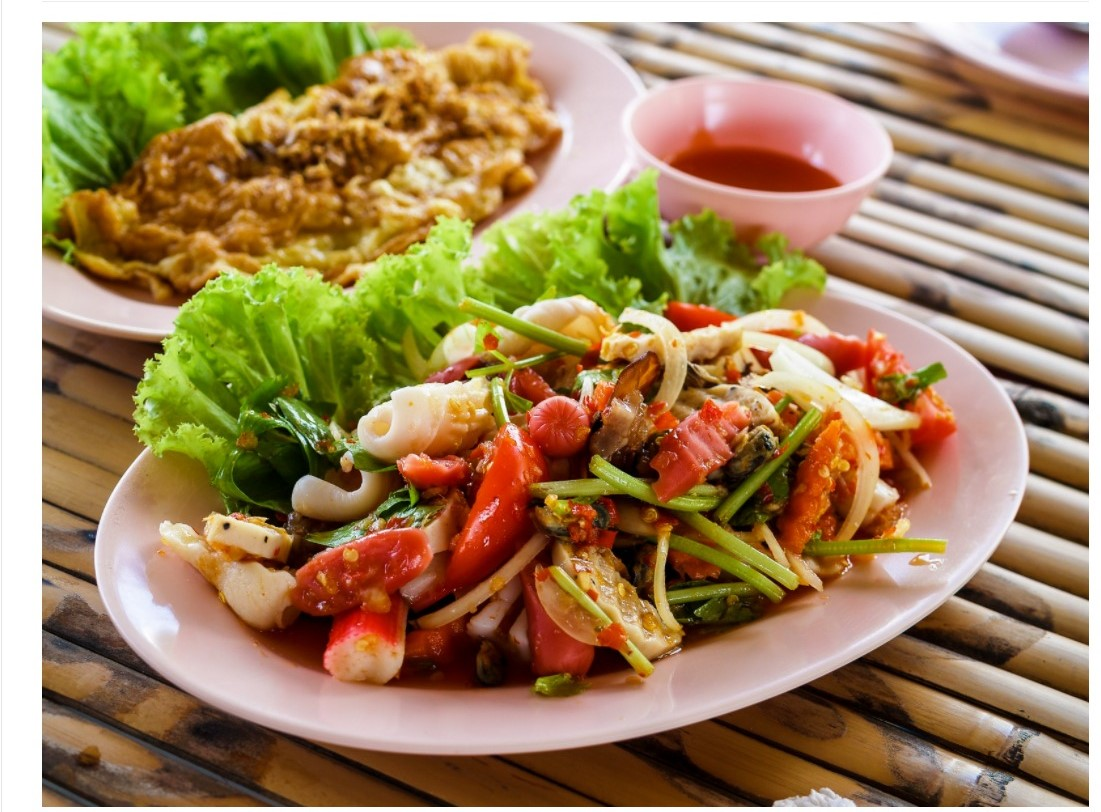

In [2]:
from IPython import display
display.Image("/content/drive/MyDrive/dataset/image.jpeg",width=800)


# Importing libraries.

In [3]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sb  
from sklearn.metrics import r2_score

#Loading and reading a dataset.

In [4]:
zomato_data=pd.read_csv("/content/drive/MyDrive/dataset/zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data cleaning 
* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Some Transformations



Looking at the information about dataset,datatypes of the corresponding columns and missing values.

In [5]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Checking NULL values.

In [6]:
zomato_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Deleting unnecessary columns. 
 Droping the columns "url" , "dish_like" , "phone"and saving the dataset as 'zomato".

In [7]:
zomato=zomato_data.drop(['url','phone','address','location','rest_type', 'menu_item', 'votes'],axis=1)

#Removing the duplicates.

In [8]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset.

In [9]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23462 non-null  object
 1   online_order                 23462 non-null  object
 2   book_table                   23462 non-null  object
 3   rate                         23462 non-null  object
 4   dish_liked                   23462 non-null  object
 5   cuisines                     23462 non-null  object
 6   approx_cost(for two people)  23462 non-null  object
 7   reviews_list                 23462 non-null  object
 8   listed_in(type)              23462 non-null  object
 9   listed_in(city)              23462 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


#Reading column names

In [10]:
#Reading column names
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

#Changing the Columns Names.

In [11]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

#Some Transformations.

In [12]:
#Changaing the cost to string.
zomato['cost'] = zomato['cost'].astype(str)

#Using lambda function to replace ',' from cost.
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

# Changing the cost to folat.
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23462 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23462 non-null  object 
 1   online_order  23462 non-null  object 
 2   book_table    23462 non-null  object 
 3   rate          23462 non-null  object 
 4   dish_liked    23462 non-null  object 
 5   cuisines      23462 non-null  object 
 6   cost          23462 non-null  float64
 7   reviews_list  23462 non-null  object 
 8   type          23462 non-null  object 
 9   city          23462 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.0+ MB


#Reading rate dataset.

In [13]:
#Reading rate dataset.
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '2.8 /5', '3.2 /5', '3.0 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#Removing '/5' from Rates.

In [14]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [15]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23315 non-null  object 
 1   online_order  23315 non-null  object 
 2   book_table    23315 non-null  object 
 3   rate          23315 non-null  float64
 4   dish_liked    23315 non-null  object 
 5   cuisines      23315 non-null  object 
 6   cost          23315 non-null  float64
 7   reviews_list  23315 non-null  object 
 8   type          23315 non-null  object 
 9   city          23315 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


# Adjust the column names.

In [16]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 750.  , 200.  , 850.  ,   1.2 , 150.  , 350.  , 250.  ,
         1.5 ,   1.3 ,   1.  , 100.  , 900.  ,   1.1 ,   1.6 , 950.  ,
       230.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,   1.8 ,   1.9 ,
       180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,
         1.25,   3.5 ,   4.  ,   2.4 ,   1.45,   3.2 ,   6.  ,   1.05,
         4.1 ,   2.3 , 120.  ,   2.6 ,   5.  ,   3.7 ,   1.65,   2.7 ,
         4.5 ])

#Get Correlation between different variables.

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

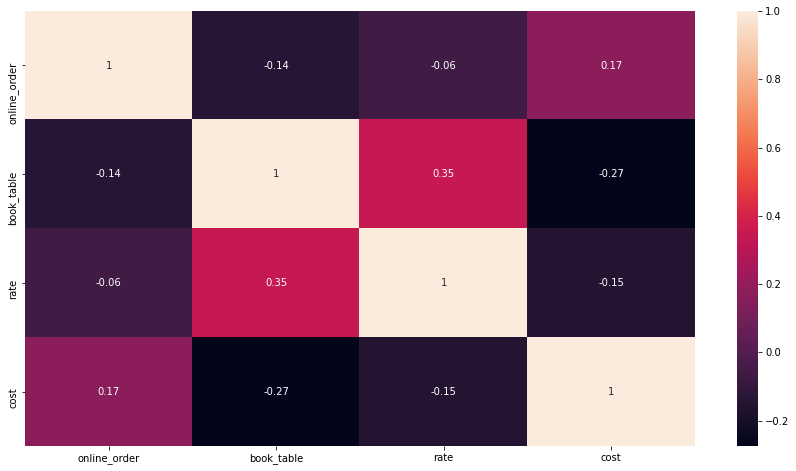

In [17]:
corr = zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato.columns

The highest correlation is between name and address which is 0.35 which is not of very much concern


# Data Visualization.


#Restaurants delivering Online or not
#Analyzing the restaurants based on availability of online order facility

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]), <a list of 10 Text major ticklabel objects>)

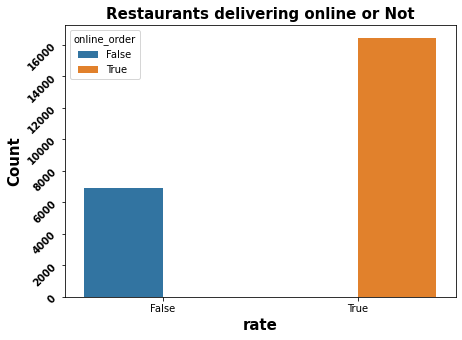

In [18]:
plt.title('Restaurants delivering online or Not', weight = 'bold',size=15)
fig = plt.gcf()
fig.set_size_inches(7,5)
sns.countplot(x="online_order", hue="online_order", data=zomato)
plt.ylabel("Count",size=15,fontweight='bold')
plt.xlabel("rate",size=15,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')


 The above graph we have almost more than 30,000 Restaurants in Bangalore that Accepts online orders through zomato and Almost of 7000 are not accpeting any online orders through zomato.

#Does online order facility impacts the rating of the restaurant?

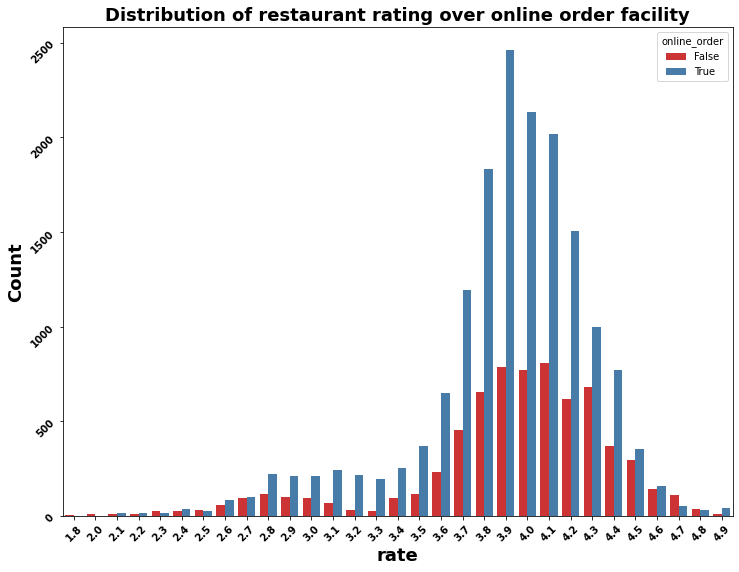

In [19]:
sns.countplot(hue = zomato["online_order"], palette = "Set1", x = zomato["rate"])
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.title("Distribution of restaurant rating over online order facility",size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')
plt.show()

Restaurants which provide online order facility has better ratings than the traditional restaurants. It makes sense because many software employees stay in Bangalore and they tend to order a lot of food through the online.

# Restaurants allowing table booking or not.

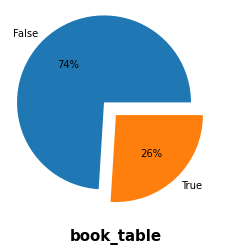

In [20]:
#book_table
slices=zomato['book_table'].value_counts().values
labels=zomato['book_table'].value_counts().index
explode = (0.2, 0)
plt.pie(slices,labels=labels,explode = explode,autopct="%.0f%%")
explode = explode
plt.xlabel("book_table",size=15,fontweight='bold')
plt.show()


Almost 74 percent of restaurants in Banglore do not provide table booking facility.and 26 percent of restaurant provide table booking In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.

#Does book table facility impacts the rating of the restaurant?

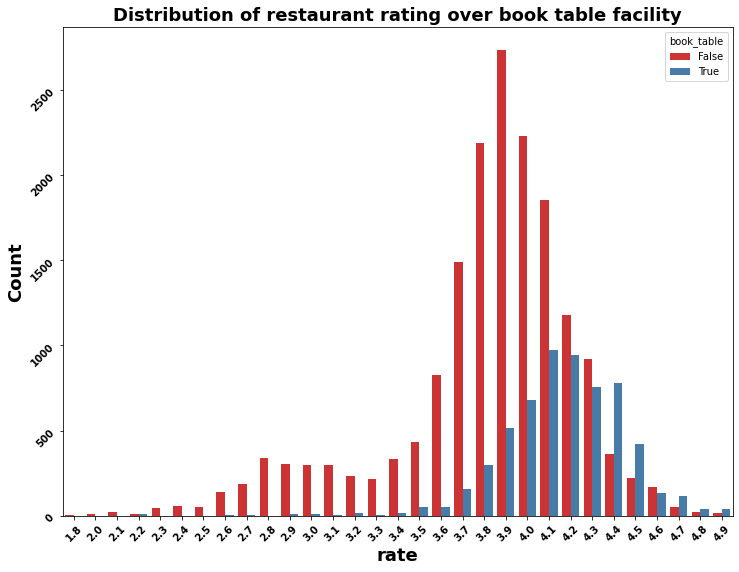

In [21]:
sns.countplot(hue = zomato["book_table"], palette = "Set1", x = zomato["rate"])
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.title("Distribution of restaurant rating over book table facility",size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')
plt.show()

Here, we do see some variation.
There are hardly any restaurants with rating from 1.8 to 3.7 that do offer the facility to book table, however the number increases for ratings from 3.8 to 4.4.
The highest number of restaurants that do not offer the facility to book table has the rating 3.7, followed by 3.8.
We conclude that in low rated restaurants you can not book table, however the high rated restaurants do offer this facility.


#City of Restaurants:-

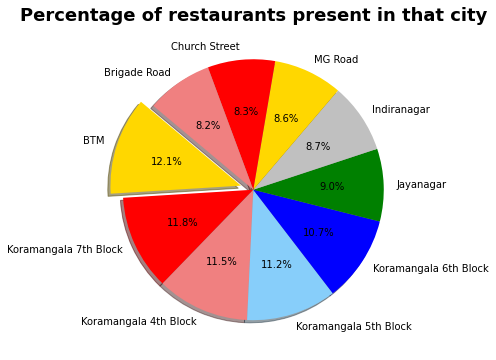

In [22]:
plt.figure(figsize = (12,6))
names = zomato['city'].value_counts()[:10].index
values = zomato['city'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Percentage of restaurants present in that city", weight = 'bold',size=18)
plt.show()

 We know that pie graph is always a composition of 100% and From the Pie Graph above you can see only The Top 10 Restaurants out of 93.
        


#Name Vs Number of Restaurants

Text(0.5, 1.0, 'Top 20 restaurants by name')

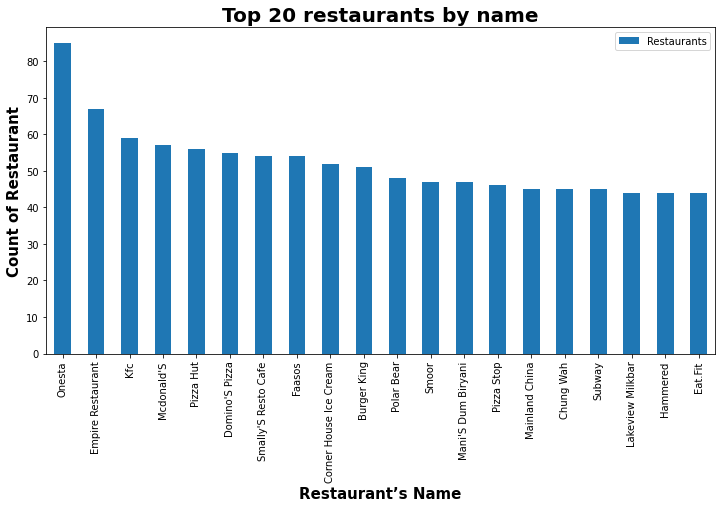

In [23]:
plt.figure(figsize=(12,6))
ax =zomato.name.value_counts()[:20].plot(kind='bar')
ax.legend(['Restaurants'])
plt.xlabel('Restaurant’s Name',fontsize=15, weight='bold')
plt.ylabel('Count of Restaurant',fontsize=15, weight='bold')
plt.title("Top 20 restaurants by name", fontsize=20, weight='bold')

from the above graph, we can see that we almost have 100 restaurants for the Franchise of Onesta.

# Type of service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

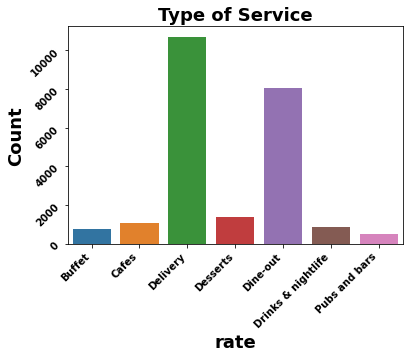

In [24]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service',size=18,fontweight='bold')
plt.ylabel("Count",size=18,fontweight='bold')
plt.xlabel("rate",size=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.yticks(rotation=45,fontweight='bold')


We see that the majority of restaurants offer delivery, which might account for the above conclusion that people at Bangalore prefer to eat at home.
Pubs and Bars and Buffet are offered by very less number of restaurants.

# Rate distribution





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


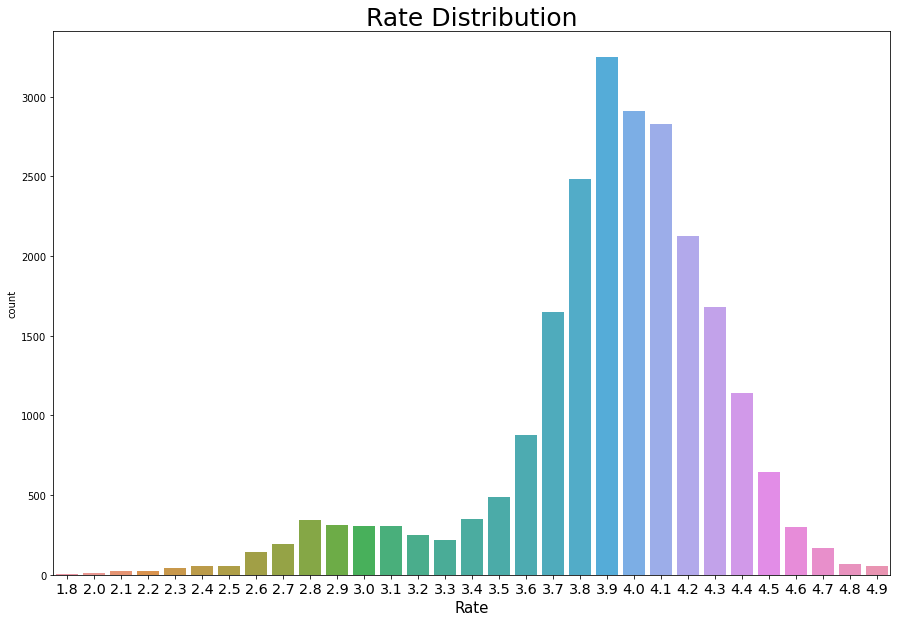

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(zomato['rate'])
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=15)
plt.xticks(fontweight='light',fontsize='x-large')
plt.show()


The majority of restaurants are rated 3.9, followed by 3.8 and 3.7, which are decent ratings. This means that most of the restaurants at Bangalore are liked by the citizens and hence rated above average. This shows that due to high rise in the number of restaurants in Bangalore there is tough competition between restaurants as they are trying to excel in quality and services to increase the number of customers.

# Restaurant types

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

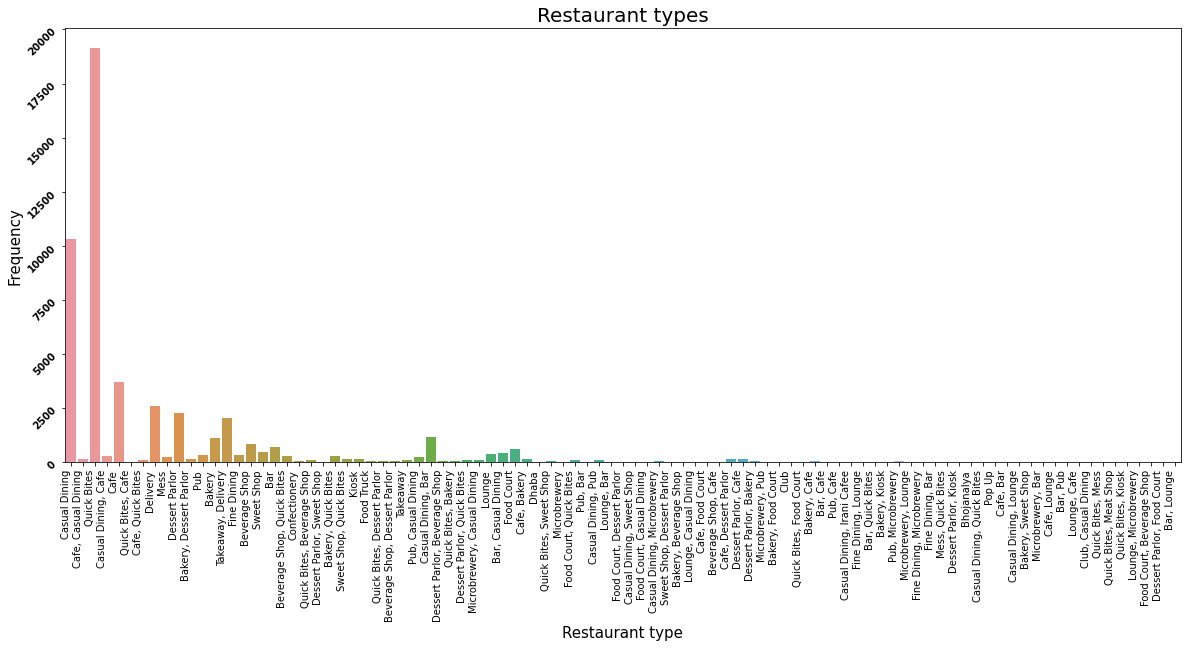

In [26]:
fig = plt.figure(figsize=(20,8))
rest = sns.countplot(x="rest_type",data=zomato_data)
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
plt.title('Restaurant types',fontsize = 20)
plt.yticks(rotation=45,fontweight='bold')


Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Banglore.

#Most famous restaurant chains in Bengaluru.


Text(0.5, 0, 'Number of outlets')

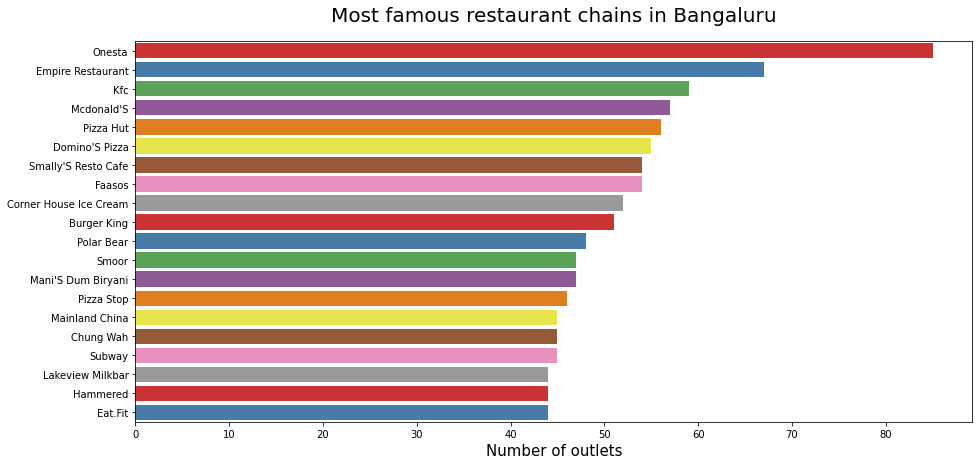

In [27]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)


As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.

In [28]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [29]:
## Checking Null values
zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64

## Computing Mean Rating

In [30]:
# Computing Mean Rating
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
zomato['Mean Rating']

0        4.118182
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
23310    3.800000
23311    3.900000
23312    3.050000
23313    2.275000
23314    4.300000
Name: Mean Rating, Length: 23315, dtype: float64

In [31]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.118182
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.100000
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.800000
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.700000
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.800000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(1)#minmaxscalar=x-min(x)/max(x)-min(x)
zomato.sample(3)


,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
22625,Mumbai Xpress,True,False,2.8,"Chai, Vada Pav, Pizza","Fast Food, Street Food",350.0,"[('Rated 1.0', ""RATED\n I can't believe the f...",Dine-out,Sarjapur Road,2.8
18406,The Mint Resto Bar,False,True,2.6,Prompt Service,"North Indian, Chinese, Andhra",1.0,"[('Rated 1.0', ""RATED\n Not satisfied with ev...",Delivery,Marathahalli,2.0
18508,Chatorezz,True,False,3.6,Paratha,"North Indian, Chinese",250.0,"[('Rated 3.5', 'RATED\n It was a rainy evenin...",Delivery,Marathahalli,3.3


# Text Preprocessing

#Some of the common text preprocessing / cleaning steps are:
* Lower casing
* Removal of Punctuations
* Removal of Stopwords
* Removal of URLs
* Spelling correction

In [33]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
110,"[('Rated 2.0', ""RATED\n Hotel is not maintain...","South Indian, Biryani, Chinese, North Indian"
19307,"[('Rated 4.0', ""RATED\n Visited this restraun...",Biryani
11659,"[('Rated 4.0', ""RATED\n Good place for breakf...","Cafe, Continental"
18077,"[('Rated 4.0', 'RATED\n A great place for the...",Ice Cream
22655,"[('Rated 2.0', 'RATED\n No AC, as summer is a...","Finger Food, Continental, Seafood"


# Lower Casing

In [34]:
# Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
12693,"[('rated 5.0', 'rated\n a place where you wil...","Lebanese, Middle Eastern"
271,"[('rated 3.0', 'rated\n avg ambience , avg fo...",Vietnamese
3701,"[('rated 5.0', 'rated\n today ordered a quick...","Cafe, Beverages, Fast Food"
2628,"[('rated 3.0', ""rated\n it was meeting a frie...","Biryani, Chinese, North Indian, South Indian"
1632,"[('rated 5.0', ""rated\n great place to hang o...","American, North Indian, Chinese, Finger Food"


# Removal of Puctuations

In [35]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
13981,rated 30 ratedn kerala biryani lacks the elai...,"North Indian, Kerala, Chinese, Biryani, Seafoo..."
19226,rated 20 ratedn dropped into meat and eat and...,"Fast Food, Burger"
5262,rated 10 ratedn accidently had visited the ba...,"Italian, North Indian, Continental"
5326,rated 30 ratedn nagashrees was recommended to...,"South Indian, North Indian, Fast Food"
4390,rated 50 ratedn its a really good dessert pla...,"Desserts, Beverages"


# Removal of Stopwords

In [36]:
 import nltk
 nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Removal of URLS

In [37]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [38]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
12568,rated 40 ratedn balle balle bdd nyou guys amaz...,North Indian
18871,rated 30 ratedn came saviour search north indi...,North Indian
4237,,"South Indian, Chinese"
17091,rated 50 ratedn love kababs ask wings legs ver...,"North Indian, Chinese, Mughlai, Seafood"
1013,rated 50 ratedn perfect place basvangudi short...,"Continental, Fast Food, Street Food, Momos"


In [39]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Chaatimes',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'Freshmenu',
 'Wamama',
 'Peppy Peppers',
 'Goa 0 Km',
 '1947',
 'Kabab Magic',
 'Gustoes Beer House',
 'The Biryani Cafe',
 'Rolls On Wheels',
 'Sri Guru Kottureshwara Davangere Benne Dosa',
 'Upahar Sagar',
 'Frozen Bottle',
 'Me

In [40]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    #removing non-aphanumeric characters and stop words.
    
    bag_of_words = vec.fit_transform(column)
    #sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]


In [41]:
zomato.head()

,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
0,Jalsa,True,True,4.1,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,Buffet,Banashankari,4.0
1,Spice Elephant,True,False,4.1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,Buffet,Banashankari,4.0
2,San Churro Cafe,True,False,3.8,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,Buffet,Banashankari,3.6
3,Addhuri Udupi Bhojana,False,False,3.7,Masala Dosa,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,Buffet,Banashankari,3.5
4,Grand Village,False,False,3.8,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,Buffet,Banashankari,3.6


In [42]:
zomato.sample(5)


,name,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
22630,Ritomi'S Lov,True,False,3.7,"Paratha, Thali, Rajma, Poha",North Indian,400.0,rated 30 ratedn hot tasty parathas aloo paneer...,Dine-out,Sarjapur Road,3.5
11770,Mad Over Donuts,True,False,4.2,"Donut, Latte, Coffee, Choco Bomb, Hot Chocolat...","Bakery, Desserts, Beverages",450.0,rated 30 ratedn would say donuts could better ...,Delivery,Koramangala 4th Block,3.9
217,Sukh Sagar,True,False,3.8,"Pav Bhaji, Chaat, Sandwiches, Coffee, Noodles,...","South Indian, North Indian, Chinese, Street Food",450.0,rated 40 ratedn food quality quantity goodnser...,Delivery,Banashankari,3.3
17803,Highteaparty Cafe,True,False,3.9,"Cheese Balls, Mushroom Pasta, Paneer Pizza, Ch...","Cafe, Continental, Steak, Italian",500.0,rated 30 ratedn shady yet really comfortable c...,Cafes,Malleshwaram,3.7
19030,Kfc,True,False,3.6,"Burgers, Crispy Chicken, Chicken Zinger Burger...","Burger, Fast Food",400.0,rated 50 ratedn kfc always kfc delicious chick...,Delivery,MG Road,3.4


In [43]:
zomato.shape

(23315, 11)

In [44]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [45]:
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [46]:
df_percent.shape

(11658, 11)

#Term Frequency-Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of evaluating the significance of a word in a given document.

TF — Term frequency(tf) refers to how many times a given term appears in a document.

IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document. The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear. Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [47]:
df_percent.set_index('name', inplace=True)

In [48]:
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix

In [49]:
t="we're go in market"
t.split()

["we're", 'go', 'in', 'market']

In [50]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [51]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

# Here is a random restaurant. let's see the details about this restaurants:

In [59]:
df_percent[df_percent.index == 'Faasos'].head()

,online_order,book_table,rate,dish_liked,cuisines,cost,reviews_list,type,city,Mean Rating
name,,,,,,,,,,
Faasos,True,False,4.2,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,rated 30 ratedn worth money pay ambience good ...,Delivery,Basavanagudi,3.8
Faasos,True,False,3.9,"Rolls, Chicken Wrap, Chicken Roll, Veggie Wrap...","North Indian, Biryani, Fast Food",500.0,rated 30 ratedn sent pizza paneer cheese rolls...,Delivery,Rajajinagar,3.8
Faasos,True,False,4.0,"Rolls, Bbq Chicken, Paneer Makhanwala, Jumbo C...","North Indian, Biryani, Fast Food",500.0,rated 40 ratedn ordered food delivery pretty q...,Dine-out,Koramangala 4th Block,3.8
Faasos,True,False,3.8,"Rolls, Sabudana Vada, Chicken Wrap, Meatballs,...","North Indian, Biryani, Fast Food",500.0,,Delivery,New BEL Road,3.8
Faasos,True,False,3.9,"Rolls, Veggie Wrap, Biryani, Paratha, Cheesy C...","North Indian, Biryani, Fast Food",500.0,rated 50 ratedn ive fan faasos wraps happy say...,Delivery,MG Road,3.8


In [60]:
recommend('Faasos')

TOP 4 RESTAURANTS LIKE Faasos WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Hunger Meals,"South Indian, North Indian, Biryani",3.6,400.0
B.M.W - Bhookh Mitaane Wala,"North Indian, South Indian, Chinese",3.4,500.0
Melange - Hotel Ekaa,"North Indian, Chinese, Continental, Mangalorean",2.8,900.0
Food Point,North Indian,2.8,450.0
